## Working with the Kaggle Database

In [1]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt 
from collections import Counter

In [2]:
#song_file = pd.HDFStore('kaggle_sample_data_1.h5')
file_paths = glob('MillionSongSubset/data/**/*.h5', recursive=True) #got 10,000 song paths yay!

def get_kaggle(path_list):
    df = pd.DataFrame() #initiate empty data frame to return with all songs
    #for every file path i want to get the song into a data frame
    for path in path_list:
        file = pd.HDFStore('MillionSongSubset/AdditionalFiles/subset_msd_summary_file.h5') #need to open the file from path
        #need to get the dataframe for every song's key to be concat together into one dataframe
        file_df = pd.DataFrame()
        for key in file.keys():
            file_df = pd.concat([file_df, file[key]], axis = 1) #puts everything into a row for the song
        df = df.append(file_df)
        unwanted_columns = ['analysis_sample_rate','analyzer_version', 'artist_7digitalid','artist_familiarity',
                            'artist_id','artist_latitude','artist_longitude','artist_mbid',
                            'artist_playmeid','audio_md5','bars_confidence','bars_start','beats_confidence',
                            'beats_start','end_of_fade_in','idx_bars_confidence','idx_bars_start','idx_beats_confidence',
                            'idx_sections_confidence','idx_sections_start','idx_segments_confidence',
                            'idx_artist_terms','idx_artist_mbtags','energy','danceability',
                            'idx_segments_loudness_max','idx_segments_loudness_max_time','idx_segments_pitches',
                            'idx_segments_start','idx_similar_artists','idx_tatums_confidence',
                            'idx_beats_start','idx_segments_loudness_start', 'idx_segments_timbre','idx_tatums_start',
                            'mode','mode_confidence','release','release_7digitalid','sections_confidence',
                            'sections_start','segments_confidence','segments_loudness_max','segments_loudness_max_time',
                            'segments_loudness_start','segments_pitches','segments_start','segments_timbre',
                            'similar_artists','song_id','start_of_fade_out','tatums_confidence','tatums_start',
                            'time_signature_confidence','track_7digitalid','track_id']
        df.drop(unwanted_columns, errors = 'ignore', inplace = True, axis = 1)
        file.close()
        return df


In [3]:

#! MillionSongSubset/data/A/R/R/TRARRZU128F4253CA2.h5'
#get_kaggle(file_paths)

In [4]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

/Users/jennwon/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
kaggle_df = get_kaggle(['MillionSongSubset/AdditionalFiles/subset_msd_summary_file.h5'])
#plt.hist(kaggle_df.year.values)
#print(len(kaggle_df))
all_years = kaggle_df.year
#print(Counter(all_years))


#apply a filter to get rid of songs before 1958 billboards available and songs without a year == 0
year_mask = ((kaggle_df.year != 0) &  (kaggle_df.year < 1958))
#print(kaggle_df.loc([year_mask]))

kaggle_df = kaggle_df.drop(kaggle_df[year_mask].index)
#len(kaggle_df_test)
kaggle_df

,duration,key,key_confidence,loudness,tempo,time_signature,artist_hotttnesss,artist_location,artist_name,genre,song_hotttnesss,title,year
0,280.21506,5,0.555,-3.306,173.205,5,0.574275,"Atlanta, GA",Mastodon,,0.597641,Deep Sea Creature,2001
1,191.68608,0,0.501,-10.764,150.955,4,0.420570,,Los Chichos,,NaN,No Quieras Marcharte,1984
2,222.92853,1,0.329,-9.035,93.056,4,0.406686,,Foxy Brown,,0.588922,If I...,0
3,278.38649,7,0.313,-23.095,127.113,1,0.291265,,Ramón Vargas;Vladimir Jurowski,,NaN,Werther - Lyric Drama in four Acts/Act I/Alors...,0
4,89.15546,2,0.000,-20.359,90.660,3,0.395710,"Belgica -- Namur, Namur/Ghent, East Flanders",Enthroned,,NaN,Ad Te Clamamus Exsvles Mortva Liberi,2010
5,255.73832,9,0.556,-5.724,101.167,1,0.555138,"Cleveland, OH",Bone Thugs-N-Harmony,,0.474055,Murder One,2000
6,239.59465,2,0.167,-10.653,173.841,3,0.430300,ITALY,Utopia,,NaN,On My Feet Again,0
7,156.96934,4,0.772,-20.816,127.547,1,0.750427,UK,Muse,,0.652836,Bedroom Acoustics,0
8,197.19791,4,0.665,-29.750,127.782,4,0.471224,,João Gilberto,,0.631601,Segredo,2000
9,262.58240,9,0.317,-5.644,90.013,5,0.342765,,Niraj Chag,,NaN,Sajana (Ft Faheem Mazhar),0


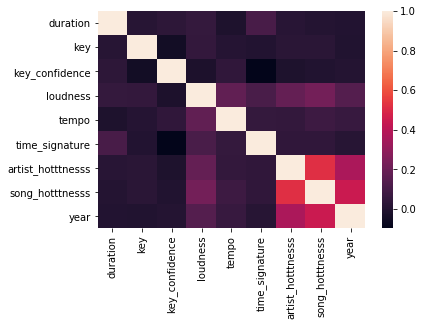

In [8]:
kaggle_heatmap = sns.heatmap(kaggle_df.corr())

fig = kaggle_heatmap.get_figure()
fig.savefig('kaggle_heatmap.png', dpi=300) 

## I have the complete data frame from Billboards now!

In [38]:
all_pickles = glob('Jomas_Pickle/*.pkl', recursive=True)
#print(all_pickles)

def unpickle(list_of_paths):
    #count = 0
    len(list_of_paths)
    complete_df = pd.DataFrame()
    list_of_df = []
    for pickle in list_of_paths:
        #count = count +1
        #print(count)
        #print(pickle)
        df = pd.read_pickle(pickle)
        list_of_df.append(df)
    #print(list_of_df)
    complete_df = pd.concat(list_of_df)
    complete_df.columns = complete_df.columns.map(str.strip)
    return complete_df

kaggle_df.rename(columns = {'artist_name': 'Artist', 'title': 'Song'}, inplace = True)

counts = unpickle(all_pickles)
counts.to_pickle('billboards_without_week_ranks.pkl')
counts = pd.DataFrame(counts.groupby(['Artist','Song']).size())
counts.reset_index(inplace = True)

#counts

## Now I want to be able to merge this dataset with Kaggle based on the song and artist indexes

In [36]:
counts.sort_values(0, ascending = False)

,Artist,Song,0
13248,Imagine Dragons,Radioactive,85
2392,AWOLNATION,Sail,79
14085,Jason Mraz,I'm Yours,76
17032,LeAnn Rimes,How Do I Live,68
20607,OneRepublic,Counting Stars,68
16843,LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,68
2498,Adele,Rolling In The Deep,65
14505,Jewel,Foolish Games/You Were Meant For Me,64
6367,Carrie Underwood,Before He Cheats,63
17253,Lifehouse,You And Me,62


In [ ]:
#i want to join these dataframes differently so that i fill in NaN with 0 in num_weeks

# left_merged = kaggle_df.merge(counts, how = 'left')
# left_merged.rename(columns = {left_merged.columns[-1]: 'num_weeks'}, inplace = True)
# left_merged['num_weeks']=left_merged['num_weeks'].fillna(0)
# #left_merged.head(5)

# right_merged = kaggle_df.merge(counts, how = 'right')
# right_merged.rename(columns = {right_merged.columns[-1]: 'num_weeks'}, inplace = True)
# right_merged['num_weeks']=right_merged['num_weeks'].fillna(0)
# #right_merged

# inner_merged = kaggle_df.merge(counts, how = 'inner')
# inner_merged.rename(columns = {inner_merged.columns[-1]: 'num_weeks'}, inplace = True)
# inner_merged['num_weeks']=inner_merged['num_weeks'].fillna(0)
# inner_merged

#right_merged.head(5)

## Inner merged dataframe reduces data set to significantly smaller amount

In [ ]:
# kaggle_heatmap = sns.heatmap(inner_merged.corr())
# fig = kaggle_heatmap.get_figure()
# #fig.savefig('kaggle_heatmap_with_weeks.png', dpi=1000) 

# correlation = inner_merged.corr()
# correlation.num_weeks.sort_values(ascending = False)
# inner_merged.to_pickle('inner_merged_df.pkl')

## Left Merged (Kaggle) provides additional information bc includes songs that don't make the top 100

In [ ]:


# kaggle_heatmap = sns.heatmap(left_merged.corr())
# fig = kaggle_heatmap.get_figure()
# #fig.savefig('kaggle_heatmap_with_weeks.png', dpi=1000) 

# correlation = left_merged.corr()
# correlation.num_weeks.sort_values(ascending = False)

## Right merged (counts) provides better understanding of what makes a song popular bc disregards songs that didn't make it into the Top 100

In [ ]:
# kaggle_heatmap = sns.heatmap(right_merged.corr())
# fig = kaggle_heatmap.get_figure()
# #fig.savefig('kaggle_heatmap_with_weeks.png', dpi=1000) 

# correlation = right_merged.corr()
# correlation.num_weeks.sort_values(ascending = False)

In [ ]:
#merged.to_pickle('kaggled_merged_with_billboard.pkl')

In [ ]:
#print(complete_df.columns, kaggle_df.columns)

## What if I merge on outer, what kind of information will I need to find to paint a more complete picture

It gives me 18844 rows to work with. From there, I am hoping to fill in missing information by utilizing the Spotify API

In [48]:
outer_merged = kaggle_df.merge(counts, how = 'outer')
outer_merged.rename(columns = {outer_merged.columns[-1]: 'num_weeks'}, inplace = True)
outer_merged['num_weeks']=outer_merged['num_weeks'].fillna(0)
outer_merged.to_pickle('outer_merged_df.pkl')

In [49]:
outer_merged

,duration,key,key_confidence,loudness,tempo,time_signature,artist_hotttnesss,artist_location,Artist,genre,song_hotttnesss,Song,year,num_weeks
0,280.21506,5.0,0.555,-3.306,173.205,5.0,0.574275,"Atlanta, GA",Mastodon,,0.597641,Deep Sea Creature,2001.0,0.0
1,191.68608,0.0,0.501,-10.764,150.955,4.0,0.420570,,Los Chichos,,NaN,No Quieras Marcharte,1984.0,0.0
2,222.92853,1.0,0.329,-9.035,93.056,4.0,0.406686,,Foxy Brown,,0.588922,If I...,0.0,0.0
3,278.38649,7.0,0.313,-23.095,127.113,1.0,0.291265,,Ramón Vargas;Vladimir Jurowski,,NaN,Werther - Lyric Drama in four Acts/Act I/Alors...,0.0,0.0
4,89.15546,2.0,0.000,-20.359,90.660,3.0,0.395710,"Belgica -- Namur, Namur/Ghent, East Flanders",Enthroned,,NaN,Ad Te Clamamus Exsvles Mortva Liberi,2010.0,0.0
5,255.73832,9.0,0.556,-5.724,101.167,1.0,0.555138,"Cleveland, OH",Bone Thugs-N-Harmony,,0.474055,Murder One,2000.0,0.0
6,239.59465,2.0,0.167,-10.653,173.841,3.0,0.430300,ITALY,Utopia,,NaN,On My Feet Again,0.0,0.0
7,156.96934,4.0,0.772,-20.816,127.547,1.0,0.750427,UK,Muse,,0.652836,Bedroom Acoustics,0.0,0.0
8,197.19791,4.0,0.665,-29.750,127.782,4.0,0.471224,,João Gilberto,,0.631601,Segredo,2000.0,0.0
9,262.58240,9.0,0.317,-5.644,90.013,5.0,0.342765,,Niraj Chag,,NaN,Sajana (Ft Faheem Mazhar),0.0,0.0
